In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/

/content/drive


In [0]:
ls

'My Drive'/


In [0]:
cd My Drive/tumour

/content/drive/My Drive/tumour


In [0]:
ls

labels.csv  train_data/       Untitled0.ipynb
test_data/  train_labels.csv  vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import keras
print(os.listdir("../tumour/train_data/"))

['Train_0.png', 'Train_104.png', 'Train_100.png', 'Train_101.png', 'Train_1.png', 'Train_102.png', 'Train_105.png', 'Train_103.png', 'Train_106.png', 'Train_10.png', 'Train_107.png', 'Train_112.png', 'Train_110.png', 'Train_108.png', 'Train_114.png', 'Train_111.png', 'Train_115.png', 'Train_113.png', 'Train_11.png', 'Train_109.png', 'Train_116.png', 'Train_118.png', 'Train_12.png', 'Train_117.png', 'Train_119.png', 'Train_124.png', 'Train_122.png', 'Train_123.png', 'Train_121.png', 'Train_120.png', 'Train_125.png', 'Train_127.png', 'Train_129.png', 'Train_128.png', 'Train_130.png', 'Train_126.png', 'Train_13.png', 'Train_133.png', 'Train_132.png', 'Train_131.png', 'Train_134.png', 'Train_136.png', 'Train_135.png', 'Train_138.png', 'Train_139.png', 'Train_141.png', 'Train_140.png', 'Train_142.png', 'Train_14.png', 'Train_137.png', 'Train_143.png', 'Train_146.png', 'Train_145.png', 'Train_144.png', 'Train_147.png', 'Train_149.png', 'Train_15.png', 'Train_148.png', 'Train_16.png', 'Train_

In [0]:
FAST_RUN = False
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size=5
filenames=os.listdir("../tumour/train_data/")

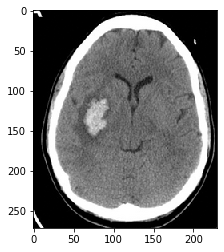

In [0]:
sample = random.choice(filenames)
image = load_img("../tumour/train_data/"+sample)
plt.imshow(image)

In [0]:
import pandas as pd
df = pd.read_csv("../tumour/train_labels.csv",header=None,names=["category"])
image_filenames=["Train_{}.png".format(i) for i in range(150)]
#print(image_filenames)
df['category'] = df['category'].replace({0:'not_hem', 1:'hem'})

df['filename']=image_filenames
df


,category,filename
0,hem,Train_0.png
1,hem,Train_1.png
2,not_hem,Train_2.png
3,not_hem,Train_3.png
4,hem,Train_4.png
...,...,...
145,not_hem,Train_145.png
146,not_hem,Train_146.png
147,hem,Train_147.png
148,not_hem,Train_148.png


In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)

validate_df = validate_df.reset_index(drop=True)

In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 256
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16
pre_trained_model = ResNet50(input_shape=input_shape, include_top=False, weights="imagenet")

NameError: ignored

In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 256
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()






58892288/58889256 [==============================] - 6s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
________________________________________________________________

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

earlystop = EarlyStopping(patience=30)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
callbacks = [earlystop, learning_rate_reduction,checkpoint]

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../tumour/train_data", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 120 validated image filenames belonging to 2 classes.


In [0]:
#df = pd.read_csv("../input/train-csv/train_labels.csv",header=None,names=["category"])
#df.iloc[1,0]

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../tumour/train_data", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)
total_validate=np.size(validate_df)/2
total_train=np.size(train_df)/2

Found 30 validated image filenames belonging to 2 classes.


In [0]:
epochs=3 if FAST_RUN else 100
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
24/24 [==============================] - 71s 3s/step - loss: 8.4878 - val_loss: 5.9100
Epoch 2/100
 4/24 [====>.........................] - ETA: 0s - loss: 7.2531

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1379: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


24/24 [==============================] - 2s 74ms/step - loss: 4.6275 - val_loss: 1.9505
Epoch 3/100
24/24 [==============================] - 3s 114ms/step - loss: 1.1880 - val_loss: 0.6163
Epoch 4/100
24/24 [==============================] - 3s 113ms/step - loss: 0.9474 - val_loss: 1.1170
Epoch 5/100
24/24 [==============================] - 3s 112ms/step - loss: 0.9409 - val_loss: 0.9475
Epoch 6/100
24/24 [==============================] - 3s 114ms/step - loss: 0.7096 - val_loss: 0.4881
Epoch 7/100
24/24 [==============================] - 3s 111ms/step - loss: 0.7764 - val_loss: 1.0409
Epoch 8/100
24/24 [==============================] - 3s 113ms/step - loss: 0.7872 - val_loss: 0.7174
Epoch 9/100
24/24 [==============================] - 3s 113ms/step - loss: 0.6615 - val_loss: 0.6016
Epoch 10/100
24/24 [==============================] - 3s 112ms/step - loss: 0.4679 - val_loss: 1.3829
Epoch 11/100
24/24 [==============================] - 3s 111ms/step - loss: 0.7707 - val_loss: 0.6067
E

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
import math
from glob import glob
import os

master = pd.read_csv("labels.csv")
master

,id,hemorrhage
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
195,195,0
196,196,0
197,197,0
198,198,0


In [0]:
#img_path = "../input/train/"

y = []
file_paths = []
for i in range(len(master)):
    file_paths.append(str(master.ix[i][0]) +'.jpg' )
    y.append(master.ix[i][1])
y = np.array(y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [0]:
file_paths

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg'

In [0]:
train_images = []
for file_path in file_paths:
    #read image
    img = (cv2.imread(file_path))

print(img)

None


In [0]:
DATADIR = r"images"



In [0]:
X_train=np.array([])
count1=0
for img in os.listdir(DATADIR):
        img_array=cv2.imread(os.path.join(DATADIR,img),cv2.IMREAD_COLOR)
        count1=count1+1
        print(count1)
       
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [0]:
np.shape(img_array)

(230, 219, 3)